In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('meteorite-landings.csv')
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [3]:
df = df.dropna(subset=['reclong', 'reclat'])
df = df[df.reclong < 300]

## 2D Histograms

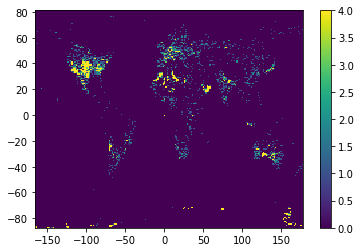

In [4]:
plt.hist2d(df.reclong, df.reclat, bins=200, vmax=4)
plt.colorbar();

## 2D Hex Plots

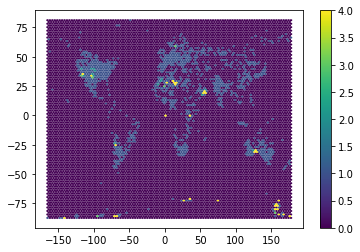

In [5]:
plt.hexbin(df.reclong, df.reclat, bins=200, vmax=4, lw=0.0)
plt.colorbar();

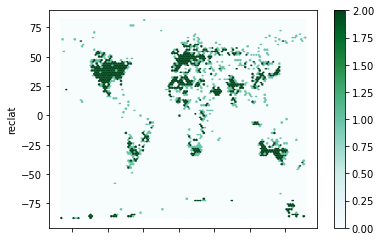

In [6]:
df.plot.hexbin(x='reclong', y='reclat', vmax=2, gridsize=100, linewidth=0.25);

## Contour

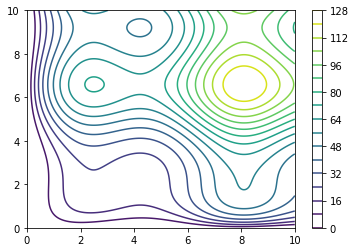

In [7]:
spacing = np.linspace(0, 10, 200)
X, Y = np.meshgrid(spacing, spacing)
Z = (np.sin(X) + np.cos(Y) + 2 * np.arcsinh(X * Y))**2

plt.contour(X, Y, Z, levels=20)
plt.colorbar();

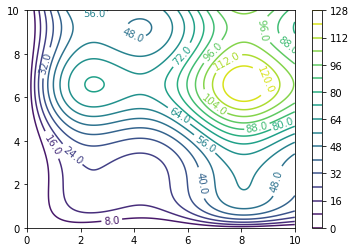

In [8]:
c = plt.contour(X, Y, Z, levels=20)
plt.clabel(c, inline=True, fmt="%0.1f")
plt.colorbar();

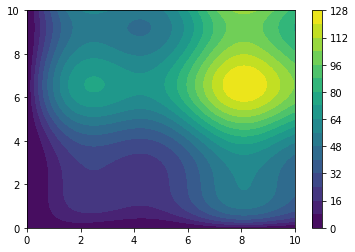

In [9]:
c = plt.contourf(X, Y, Z, levels=20)
plt.colorbar();

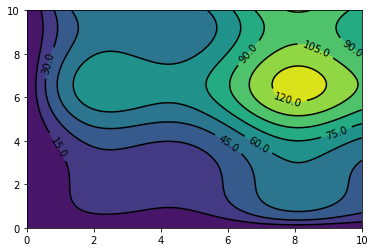

In [10]:
plt.contourf(X, Y, Z, levels=10)
c = plt.contour(X, Y, Z, levels=10, colors="black")
plt.clabel(c, inline=True, fmt="%0.1f");

## KDE

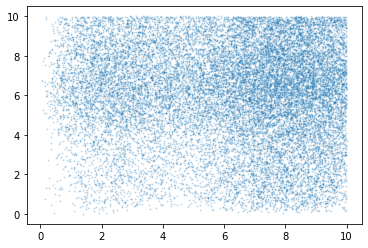

In [11]:
# This is called rejection sampling, a way to brute force sample any surface, so long
# as you're fine waiting for slow code
n = 50000
xs, ys = np.random.uniform(0, 10, n), np.random.uniform(0, 10, n)
zs = (np.sin(xs) + np.cos(ys) + 2 * np.arcsinh(xs * ys))**2
zs /= zs.max()
passed = np.random.uniform(0, 1, n) < zs
xs, ys = xs[passed], ys[passed]
plt.scatter(xs, ys, s=1, alpha=0.2);

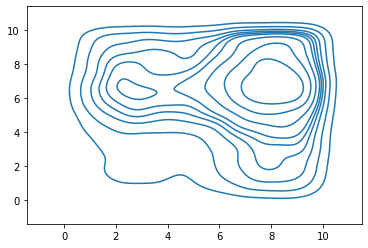

In [12]:
sns.kdeplot(x=xs, y=ys);

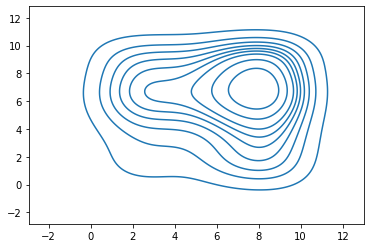

In [13]:
sns.kdeplot(x=xs, y=ys, bw_adjust=2.0);

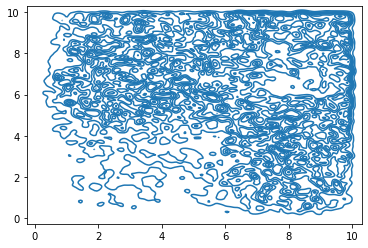

In [14]:
sns.kdeplot(x=xs, y=ys, bw_adjust=0.2);

## Jointplots

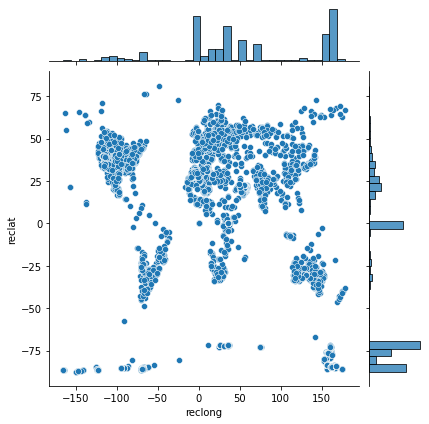

In [15]:
sns.jointplot(data=df, x='reclong', y='reclat');

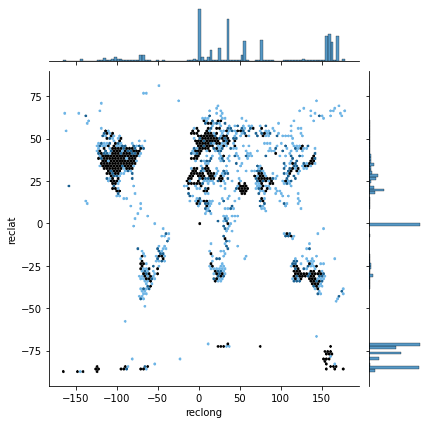

In [16]:
sns.jointplot(data=df, x='reclong', y='reclat', kind='hex', 
             gridsize=100, vmax=3, linewidth=0, marginal_kws={'bins': 100});

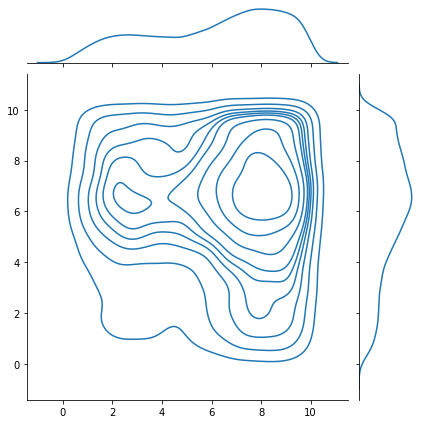

In [17]:
sns.jointplot(x=xs, y=ys, kind='kde');

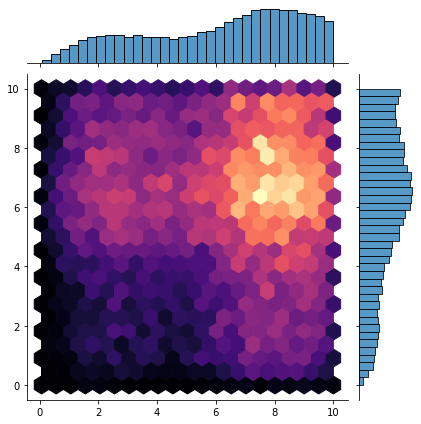

In [18]:
sns.jointplot(x=xs, y=ys, kind='hex', gridsize=20, cmap='magma');

In [19]:
sns.pairplot(data=df[['reclat', 'reclong', 'mass']]);

KeyboardInterrupt: 